In [0]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
# np.random.seed(0)
# x = np.random.rand(100, 1)
# y = 2 + 3 * x + np.random.rand(100, 1)

In [0]:
# reading the dataset file
file = open('/content/drive/My Drive/Cyber Project/final_dataset.json')
json1 = json.load(file)

In [0]:
# some salaries have null/improper values, so filter them out
json1 = list(filter(lambda x: x['avgSalary'], json1))

In [0]:
# taking care of outliers
# some candidates receive ridiculously high salary for their level of exp

json1 = list(filter(lambda x: x['avgSalary'] < 3500000, json1))

In [0]:
# some formatting
x = np.array([list(map(lambda x: x['avgExp'], json1))])
y = np.array([list(map(lambda x: x['avgSalary'], json1))])

x = np.transpose(x)
y = np.transpose(y)
# x = list(map(lambda x: x['avgExp'], json1))
# y = list(map(lambda x: x['avgSalary'], json1))

In [0]:
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)



Slope: [[132225.89775282]]
Intercept: [142689.49555097]
Root mean squared error:  265022043721.71875
R2 score:  0.4654570948268447


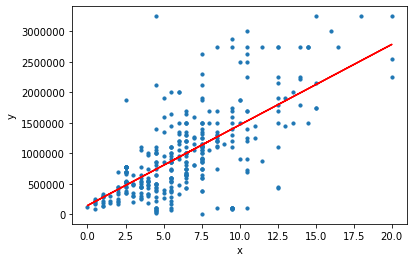

In [0]:
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

# New Section

In [0]:
exp = 1
salary = 132225.89775282 * exp + 142689.49555097

print ('salary is: ' + str(salary))


salary is: 274915.39330379


In [0]:
df = pd.read_json('/content/drive/My Drive/Cyber Project/final_dataset.json')
margin = 100000

df.query('avgSalary < ' + str(salary + margin) + ' & avgSalary > ' +str(salary - margin))

,desig,exp,loc,org,salary,skillset,url,lowerExp,higherExp,id,location,lowerSalary,higherSalary,avgSalary,avgExp
9,Analyst - Abuse Mitigation and Compliance,0-2 yrs,"Mumbai, Mumbai Suburbs",Endurance International Group (India) Pvt Ltd,"2,00,000 - 3,50,000 PA.","channel partners, cyber security, network secu...",https://www.naukri.com/job-listings-Analyst-Ab...,0,2,19,mumbai,200000,350000.0,275000.0,1.0
19,"Vacancy - IT Executive - Vibgyor School, Pune ...",2-7 yrs,Pune(NIBM),Rustomjee Kerawala Foundation,"2,50,000 - 3,00,000 PA.","it security, erp, software, it procurement, ne...",https://www.naukri.com/job-listings-Vacancy-IT...,2,7,57,pune,250000,300000.0,275000.0,4.5
24,High Urgency For Cyber Security Analyst Position.,0-3 yrs,Noida(Sector-82 Noida),Virtual Employee Pvt. Ltd,"2,00,000 - 4,00,000 PA.","Email Phishing, security analysis, cyber secur...",https://www.naukri.com/job-listings-High-Urgen...,0,3,96,noida,200000,400000.0,300000.0,1.5
28,Inside Sales Executive,1-3 yrs,Bengaluru(Wilson Garden),Recrewt HR Consulting Services Private Limited,"50,000 - 3,00,000 PA.","Network Security, Cold Calling, Inside Sales, ...",https://www.naukri.com/job-listings-Inside-Sal...,1,3,108,bengaluru,50000,300000.0,175000.0,2.0
29,Technical Support Engineer,0-3 yrs,Chennai(Adyar),Satvat Infosol Pvt Ltd,"1,25,000 - 2,50,000 PA.","Communication Skills, Network Configuration, P...",https://www.naukri.com/job-listings-Technical-...,0,3,109,chennai,125000,250000.0,187500.0,1.5
30,"Urgent Opening For Network Engineer in Baner, ...",1-2 yrs,Pune,S2 INFOTECH INTERNATIONAL LIMITED,"1,75,000 - 2,75,000 PA.","Network Engineering, Hardware Networking, Netw...",https://www.naukri.com/job-listings-Urgent-Ope...,1,2,115,pune,175000,275000.0,225000.0,1.5
54,Huge Openings For Associates - Cyber Security,0-2 yrs,"Chennai, Hyderabad, Pune",Faxhion Technologies Private Limited,"2,00,000 - 4,00,000 PA.","Embedded C, Java, C++, Cyber Security, Network...",https://www.naukri.com/job-listings-Huge-Openi...,0,2,173,NaN,200000,400000.0,300000.0,1.0
55,Hiring For Cyber Security Engineers(fresher's),0-2 yrs,Bengaluru,Faxhion Technologies Private Limited,"2,00,000 - 4,00,000 PA.","Embedded C, Java, C++, Cyber Security, Network...",https://www.naukri.com/job-listings-Hiring-For...,0,2,174,bengaluru,200000,400000.0,300000.0,1.0
87,Security Consultant at Breachlock LLP,1-3 yrs,Noida(Sector-2 Noida),BreachLock,"3,25,000 - 4,00,000 PA.","Cyber Security, Oscp, Networking, Penetration ...",https://www.naukri.com/job-listings-Security-C...,1,3,293,noida,325000,400000.0,362500.0,2.0
91,Sharepoint Developer,3-8 yrs,Bengaluru,Technosoft Global Services Pvt Ltd,"50,000 - 3,00,000 PA.","Data Science, Business Intelligence, Cyber Sec...",https://www.naukri.com/job-listings-Sharepoint...,3,8,314,bengaluru,50000,300000.0,175000.0,5.5
